In [194]:
import numpy as np
from scipy.stats import powerlaw, norm, uniform
import matplotlib.pyplot as plt
%matplotlib inline  

In [270]:
a0 = 40
a1 = 1
mean0, var0, skew0, kurt0 = powerlaw.stats(a0, moments='mvsk')
mean1, var1, skew1, kurt1 = powerlaw.stats(a1, moments='mvsk')
print(mean0, var0, skew0, kurt0)
print(mean1, var1, skew1, kurt1)

0.975609756097561 0.0005665561882099657 -1.8587492087089506 4.928276955602537
0.5 0.08333333333333333 -0.0 -1.2


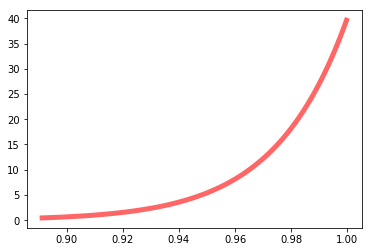

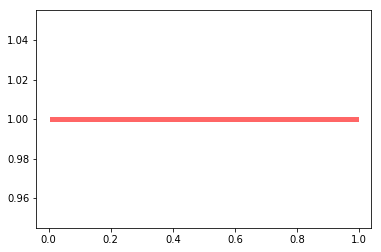

In [271]:
x = np.linspace(powerlaw.ppf(0.01, a0),powerlaw.ppf(0.99, a0), 100)
plt.plot(x, powerlaw.pdf(x, a0), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

x = np.linspace(powerlaw.ppf(0.01, a1),powerlaw.ppf(0.99, a1), 100)
plt.plot(x, powerlaw.pdf(x, a1), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

Hypothesis 0
Mean of Sum = 19.512304208129205, Sum/sqrt(K) = 1.0010247861191783
Variance of Sum = 0.011301026411584408, Sum/sqrt(K) = 0.997343833388353
Hypothesis 1
Mean of Sum = 9.988898276286001, Sum/sqrt(K) = -0.008599358211701425
Variance of Sum = 1.6561962904787895, Sum/sqrt(K) = 0.9937177742872736


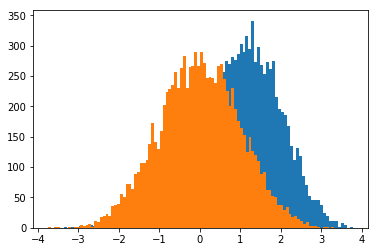

In [272]:
N = 10000                                   #training set
K = 20                                #sum of K random variables

mean_diff = 1

s0 = np.zeros(N)
s1 = np.zeros(N)


c0 = np.zeros(N)
c1 = np.zeros(N)
for i in range(N):
    s0[i] = np.sum(powerlaw.rvs(a0, size=K))               #Observation for hypothesis 0
    s1[i] = np.sum(powerlaw.rvs(a1, size=K))               #Observation hypothesis 1

c0 = (s0 - K*mean0)/np.sqrt(K*var0)
c1 = (s1 - K*mean1)/np.sqrt(K*var1)
c0 = mean_diff + c0

e_mean0 = np.mean(c0) 
e_var0 = np.std(c0)**2

e_mean1 = np.mean(c1)
e_var1 = np.std(c1)**2

print("Hypothesis 0")
print("Mean of Sum = {}, Sum/sqrt(K) = {}".format(np.mean(s0), e_mean0))
print("Variance of Sum = {}, Sum/sqrt(K) = {}".format(np.std(s0)**2, e_var0))


print("Hypothesis 1")
print("Mean of Sum = {}, Sum/sqrt(K) = {}".format(np.mean(s1), e_mean1))
print("Variance of Sum = {}, Sum/sqrt(K) = {}".format(np.std(s1)**2, e_var1))

#plt.hist(s0, bins = 100)
#plt.hist(s1, bins = 100)
plt.hist(c0, bins = 100)
plt.hist(c1, bins = 100)
plt.show()


In [273]:
# Generate Test data

Ntest = 100000

test_c0 = np.zeros(Ntest)
test_c1 = np.zeros(Ntest)
for i in range(Ntest):
    test_c0[i] = np.sum(powerlaw.rvs(a0, size=K))              #Observation for hypothesis 0
    test_c1[i] = np.sum(powerlaw.rvs(a1, size=K))               #Observation hypothesis 1

test_c0 = (test_c0 - K*mean0)/(np.sqrt(K*var0)) 
test_c1 = (test_c1 - K*mean1)/(np.sqrt(K*var1))
test_c0 = mean_diff + test_c0

In [274]:
# Detection Assuming the Sum, Sum/K and Sum/sqrt(K) behave like gaussain

Threshold = (e_mean0 + e_mean1)/2
print("Threshold = ", Threshold)

Error = 0
for i in range(Ntest):
    if test_c0[i] <= Threshold:
        Error += 1
    if test_c1[i] > Threshold:
        Error += 1 
emprical_error = Error/(2*Ntest)
print(emprical_error)

gaussian_error = 1 - norm.cdf(mean_diff/2)
print("Gaussian error: ", gaussian_error)
print("% error: ", (emprical_error - gaussian_error)*100/gaussian_error)

Threshold =  0.496212713954
0.300875
Gaussian error:  0.308537538726
% error:  -2.48350290134
